In [22]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
import requests
import shutil
import numpy as np
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import kurtosis, skew
%matplotlib inline

In [23]:
#Download the latest CSV file from the WHO website
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
r = requests.get(url, allow_redirects=True)
#Save the content with name.
open('WHO-COVID-19-global-data.csv', 'wb').write(r.content)

3433564

In [24]:
dataframe = pd.read_csv('WHO-COVID-19-global-data.csv')
dataframe.head

<bound method NDFrame.head of       Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-03           AF  Afghanistan       EMRO          0   
1        2020-01-04           AF  Afghanistan       EMRO          0   
2        2020-01-05           AF  Afghanistan       EMRO          0   
3        2020-01-06           AF  Afghanistan       EMRO          0   
4        2020-01-07           AF  Afghanistan       EMRO          0   
...             ...          ...          ...        ...        ...   
80488    2020-12-05           ZW     Zimbabwe       AFRO        123   
80489    2020-12-06           ZW     Zimbabwe       AFRO         70   
80490    2020-12-07           ZW     Zimbabwe       AFRO        101   
80491    2020-12-08           ZW     Zimbabwe       AFRO        121   
80492    2020-12-09           ZW     Zimbabwe       AFRO          0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                     0           0                  0  
1  

In [25]:
USA=dataframe[dataframe.Country == 'United States of America']
USA

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
76723,2020-01-03,US,United States of America,AMRO,0,0,0,0
76724,2020-01-04,US,United States of America,AMRO,0,0,0,0
76725,2020-01-05,US,United States of America,AMRO,0,0,0,0
76726,2020-01-06,US,United States of America,AMRO,0,0,0,0
76727,2020-01-07,US,United States of America,AMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
77061,2020-12-06,US,United States of America,AMRO,213127,14191298,2426,276503
77062,2020-12-07,US,United States of America,AMRO,205837,14397135,2303,278806
77063,2020-12-08,US,United States of America,AMRO,173388,14570523,1107,279913
77064,2020-12-09,US,United States of America,AMRO,185473,14755996,1529,281442


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012924F84A90>,
      dtype=object)

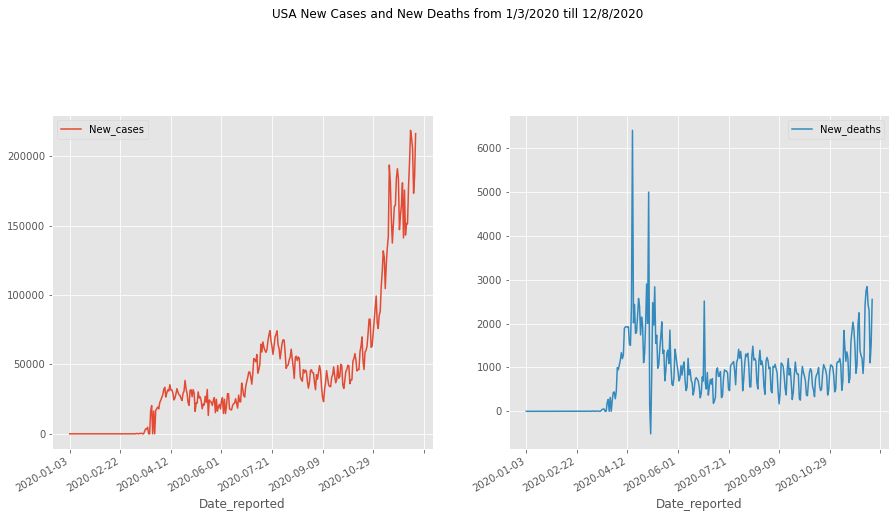

In [41]:
plt.style.use('ggplot')
USA.plot(x='Date_reported', y=['New_cases','New_deaths'], title="USA New Cases and New Deaths from 1/3/2020 till 12/8/2020", subplots=True, legend=True, layout=(2,2), figsize=(15,15))

In [27]:
China=dataframe[dataframe.Country == 'China']
China

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
14387,2020-01-03,CN,China,WPRO,0,0,0,0
14388,2020-01-04,CN,China,WPRO,1,1,0,0
14389,2020-01-05,CN,China,WPRO,0,1,0,0
14390,2020-01-06,CN,China,WPRO,3,4,0,0
14391,2020-01-07,CN,China,WPRO,0,4,0,0
...,...,...,...,...,...,...,...,...
14725,2020-12-06,CN,China,WPRO,122,94160,0,4753
14726,2020-12-07,CN,China,WPRO,133,94293,0,4753
14727,2020-12-08,CN,China,WPRO,90,94383,0,4753
14728,2020-12-09,CN,China,WPRO,117,94500,0,4753


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012922C1F9D0>,
      dtype=object)

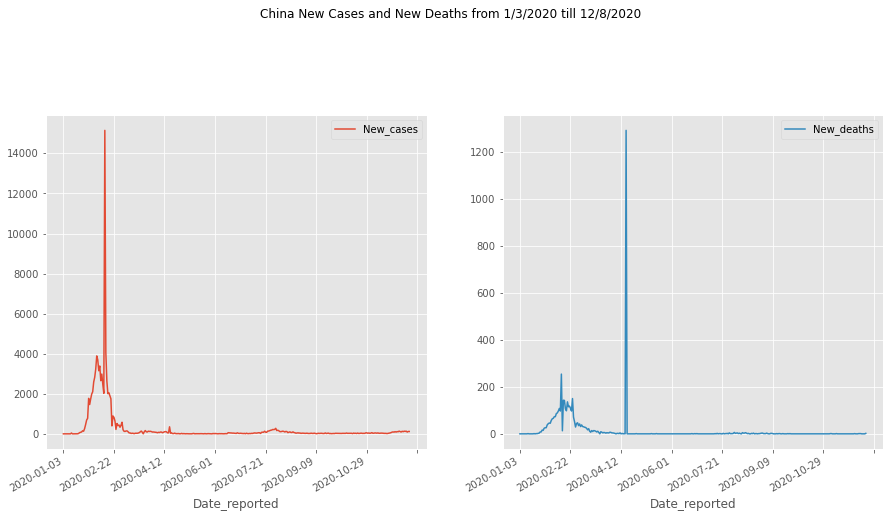

In [42]:
plt.style.use('ggplot')
China.plot(x='Date_reported', y=['New_cases','New_deaths'], title="China New Cases and New Deaths from 1/3/2020 till 12/8/2020", subplots=True, legend=True, layout=(2,2), figsize=(15,15))

In [29]:
#load the data
usa_data= pd.read_csv('USA1.csv')
#This will set my index as date column
usa_data.index= pd.to_datetime(usa_data['Date_reported'])
usa_data = usa_data.drop(['Date_reported'], axis=1)
usa_data.head()

,Country,Temperature,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,
2020-01-03,United States of America,49.7,0,0,0,0
2020-01-04,United States of America,52.4,0,0,0,0
2020-01-05,United States of America,40.8,0,0,0,0
2020-01-06,United States of America,44.1,0,0,0,0
2020-01-07,United States of America,37.6,0,0,0,0


In [30]:
#Check for missing data
usa_data.isna().any()

Country              False
Temperature          False
New_cases            False
Cumulative_cases     False
New_deaths           False
Cumulative_deaths    False
dtype: bool

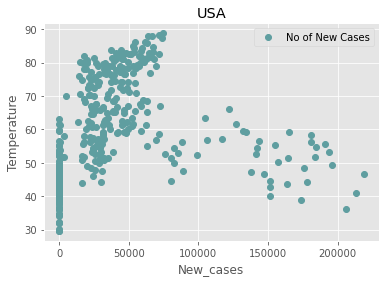

In [40]:
#define x & y data
x=usa_data['New_cases']
y=usa_data['Temperature']
plt.plot(x, y,'o', color='cadetblue', label = 'No of New Cases')
#make sure it is formatted
plt.title("USA")
plt.xlabel("New_cases")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [36]:
#measuring the coorelation
usa_data.corr()

,Temperature,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Temperature,1.000000,0.085548,0.152947,0.172643,0.406353
New_cases,0.085548,1.000000,0.884763,0.453587,0.795409
Cumulative_cases,0.152947,0.884763,1.000000,0.309909,0.948308
New_deaths,0.172643,0.453587,0.309909,1.000000,0.337722
Cumulative_deaths,0.406353,0.795409,0.948308,0.337722,1.000000


In [33]:
#Check the data type of each column
usa_data.dtypes

Country               object
Temperature          float64
New_cases              int64
Cumulative_cases       int64
New_deaths             int64
Cumulative_deaths      int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012924C359D0>,
      dtype=object)

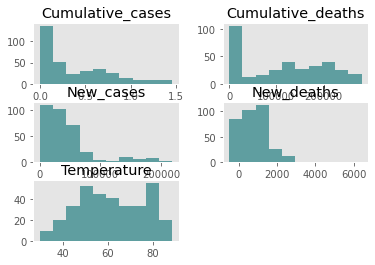

In [34]:
usa_data.hist(grid= False, color= 'cadetblue')